In [391]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
#print(os.getcwd())
#if os.path.basename(os.getcwd()) != 'NeuroCurve': os.chdir('NeuroCurve')

# Processing

In [387]:
os.chdir('..')
NeuroCurveOG = pd.read_csv("CSV/alzheimers_disease_data.csv")
"Drops any unnecessary features of the original dataset"
def pre_process():
    usableCSV = NeuroCurveOG.drop(columns=["PatientID", "CardiovascularDisease", "DoctorInCharge", "Depression", "Depression", "SystolicBP", "DiastolicBP", "Ethnicity", "Gender", "Confusion", "PersonalityChanges", "Forgetfulness", "DifficultyCompletingTasks", "Disorientation", "Hypertension", "HeadInjury", "Diabetes", "Smoking"])
    usableCSV.to_csv('CSV/output_CSVs/processed.csv')
pre_process()
usableCSV = pd.read_csv('CSV/output_CSVs/processed.csv')
os.chdir('NeuroPy')

X = usableCSV.drop(columns=['Diagnosis', 'Unnamed: 0'])
y = usableCSV['Diagnosis']

categorical_cols = ['FamilyHistoryAlzheimers']
X[categorical_cols] = X[categorical_cols].astype('category')
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding

''' Scale features '''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("List of input variables with example data")
print("PhysicalActivity, DietQuality, and  Sleep quality are all measured 1.0-10.0\n")
for col in X.columns:
    print(f"{col}: {X[col].iloc[0]}")



List of input variables with example data
PhysicalActivity, DietQuality, and  Sleep quality are all measured 1.0-10.0

Age: 73
EducationLevel: 2
BMI: 22.927749230993864
AlcoholConsumption: 13.29721772827684
PhysicalActivity: 6.327112473553353
DietQuality: 1.3472143059081076
SleepQuality: 9.025678665766115
CholesterolTotal: 242.36683969636556
CholesterolLDL: 56.15089696091113
CholesterolHDL: 33.68256349839592
CholesterolTriglycerides: 162.18914307736603
MMSE: 21.46353236431666
FunctionalAssessment: 6.518876973217633
MemoryComplaints: 0
BehavioralProblems: 0
ADL: 1.7258834599441897
FamilyHistoryAlzheimers_1: False


# Model Test Split


In [388]:
''' ----------- Train/Test Split ----------- '''
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Training

In [389]:
''' ----------- Logistic Model Training ----------- '''
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

'''------------- Decision Tree Model Training ---------'''
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)

'''------------ Mythical Forest Model Training---------'''
forest = RandomForestClassifier(max_features='sqrt', n_estimators=len(X_train), random_state=42)
forest.fit(X_train, y_train)
print("Number of trees in the Mythical Forest: " + str(len(forest.estimators_)))

'''----------------CatBoost Training--------'''
histGradient = HistGradientBoostingClassifier(max_iter=300)
histGradient.fit(X_train, y_train)



KeyboardInterrupt: 

# Analysis

In [ ]:
''' ----------- Evaluation ----------- '''
y_prob = model.predict_proba(X_test)
print("Predicted probabilities for the first 5 examples:\n", y_prob[:5])
y_pred = model.predict(X_test)
print(f"y_pred: {y_pred[:5]}")
print(f"y_test: {y_test.values[:5]}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


y_prob_forest = forest.predict_proba(X_test)
print("Predicted probabilities for the first 5 examples:\n", y_prob_forest[:5])
y_pred_forest = forest.predict(X_test)
print(f"y_pred: {y_pred_forest[:5]}")
print(f"y_test: {y_test.values[:5]}")
accuracy = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy: {accuracy * 100:.2f}%")

y_prob_hist = histGradient.predict_proba(X_test)
print("Predicted probabilities for the first 5 examples:\n", y_prob_forest[:5])
y_pred_hist = histGradient.predict(X_test)
print(f"y_pred: {y_pred_hist[:5]}")
print(f"y_test: {y_test.values[:5]}")
accuracy = accuracy_score(y_test, y_pred_hist)
print(f"Accuracy: {accuracy * 100:.2f}%")


Predicted probabilities for the first 5 examples:
 [[0.14700887 0.85299113]
 [0.7350354  0.2649646 ]
 [0.05576215 0.94423785]
 [0.48886086 0.51113914]
 [0.00106805 0.99893195]]
y_pred: [1 0 1 1 1]
y_test: [1 1 1 1 1]
Accuracy: 81.63%
Predicted probabilities for the first 5 examples:
 [[0.07911576 0.92088424]
 [0.89005236 0.10994764]
 [0.24549156 0.75450844]
 [0.44328098 0.55671902]
 [0.05700989 0.94299011]]
y_pred: [1 0 1 1 1]
y_test: [1 1 1 1 1]
Accuracy: 94.88%
Predicted probabilities for the first 5 examples:
 [[0.07911576 0.92088424]
 [0.89005236 0.10994764]
 [0.24549156 0.75450844]
 [0.44328098 0.55671902]
 [0.05700989 0.94299011]]
y_pred: [1 0 1 1 1]
y_test: [1 1 1 1 1]
Accuracy: 95.12%


# Visualization

### Mythical Forest Confusion Matrix

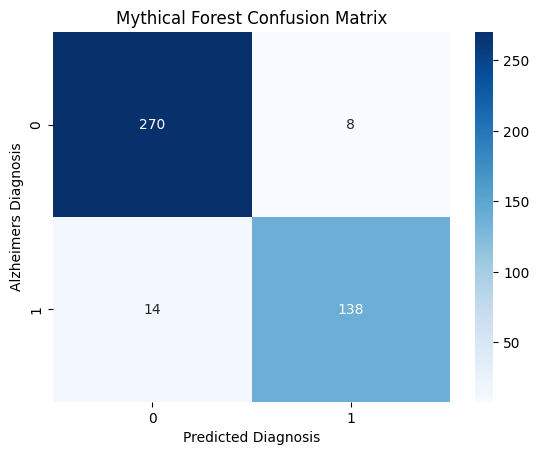

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("Mythical Forest Confusion Matrix")
plt.ylabel("Alzheimers Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.show()

Hist Confusion Matrix

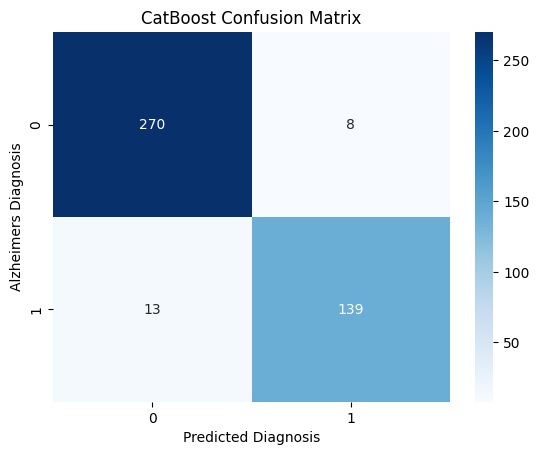

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_hist)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("CatBoost Confusion Matrix")
plt.ylabel("Alzheimers Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.show()

### Classification Report: Mythical Forest

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.95      0.91      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



### Logistic Regression ROC Curve

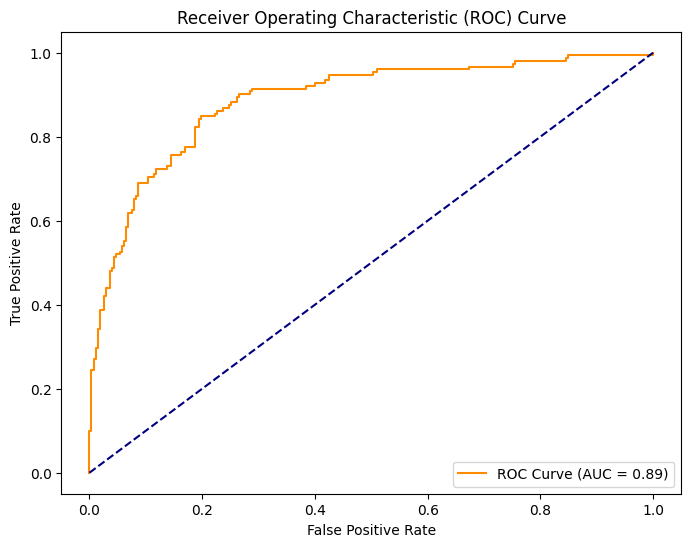

In [ ]:
y_prob_class1 = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_class1)
roc_auc = roc_auc_score(y_test, y_prob_class1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Mythical Forest ROC Curve

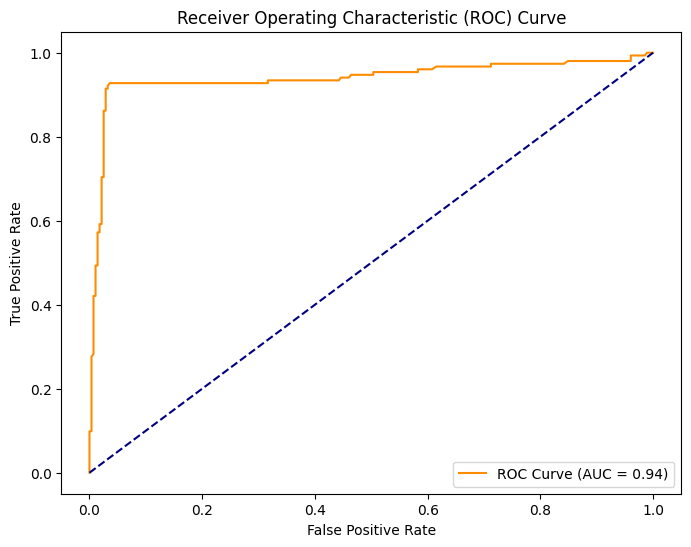

In [ ]:
y_prob_forest = y_prob_forest[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_forest)
roc_auc = roc_auc_score(y_test, y_prob_forest)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Hist ROC Curve

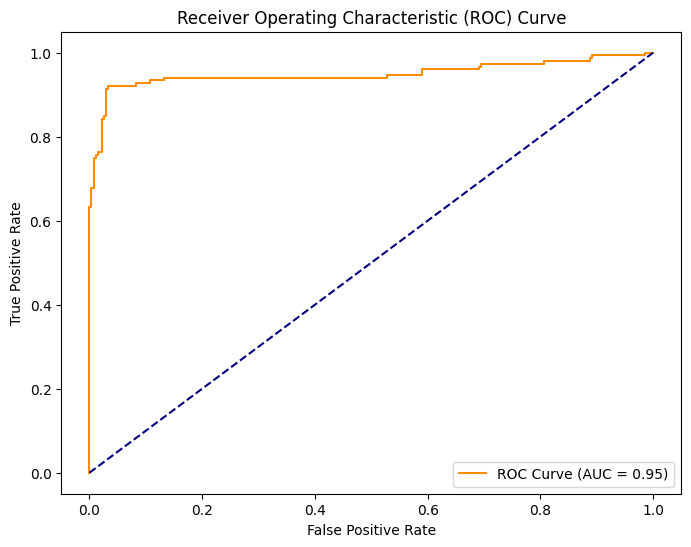

In [ ]:
y_prob_hist = y_prob_hist[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_hist)
roc_auc = roc_auc_score(y_test, y_prob_hist)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [353]:


import numpy as np
"""
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
"""

'\nparam_grid = {\n    \'C\': [0.01, 0.1, 1, 10],\n    \'penalty\': [\'l1\', \'l2\'],\n    \'solver\': [\'liblinear\']\n}\ngrid = GridSearchCV(LogisticRegression(class_weight=\'balanced\', max_iter=1000), param_grid, cv=5, scoring=\'roc_auc\')\ngrid.fit(X_train, y_train)\nprint("Best Parameters:", grid.best_params_)\n'

### Plotting Risk as a function of Age

In [365]:
def generate_age_risk(sample: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a DataFrame for one patient, iterating their age from 10 years prior to 100,
    updating 'Age' and 'ADL' while keeping other features constant.
    
    Args:
        sample: DataFrame with one row containing patient features.
    
    Returns:
        DataFrame with rows for each age, preserving original features except 'Age' and 'ADL'.
    """
    original_age = sample["Age"].iloc[0]
    start_age = max(0, original_age - 10)  # Ensure age doesn't go negative
    ages = np.arange(start_age, 101, 1)  # Ages from start_age to 100
    result_rows = []

    for age in ages:
        new_row = sample.copy()
        new_row["Age"] = age
        result_rows.append(new_row)

    result_df = pd.concat(result_rows, ignore_index=True)
    return result_df

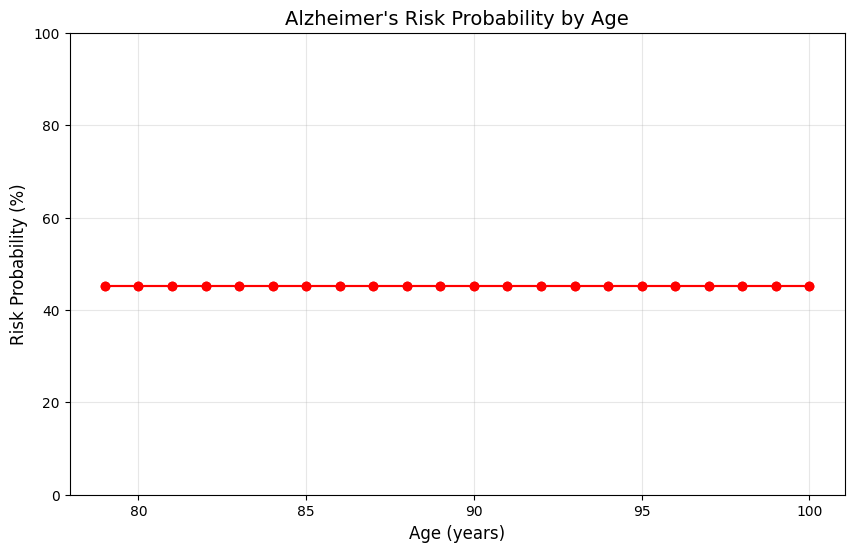

In [ ]:
def plot_risk_over_age(model, age_variants_df):
    """
    Plots predicted risk probability vs. age for a given patient using the model.
    
    Args:
        model: Trained classifier with predict_proba method
        age_variants_df: DataFrame with patient features, varying 'Age'
    """
    # Convert to numpy array to avoid feature name mismatch
    X_pred = age_variants_df.values
        
            
    # Get probabilities (convert to percentage)
    probs = model.predict_proba(X_pred)
    risk_percent = probs[:, 1] * 100  # Convert to percentage
        
        # Get ages
    ages = age_variants_df["Age"].values
        
        # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(ages, risk_percent, marker='o', linestyle='-', color='red')
    plt.plot(ages, risk_percent, marker='o', linestyle='-', color='red')
    plt.title("Alzheimer's Risk Probability by Age", fontsize=14)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("Risk Probability (%)", fontsize=12)
    plt.ylim(0, 100)  # Ensure percentage scale
    plt.grid(True, alpha=0.3)
    plt.show()
        


# Example usage
# Assuming 'X' is your feature DataFrame and 'model' is your trained model
sample_df = X.iloc[[10]]  # Select a single patient (row 10)
patient_age_risk = generate_age_risk(sample_df)
plot_risk_over_age(forest, patient_age_risk)

### Feature Weight in Models

In [367]:
# Assuming `model` is your trained RandomForestClassifier
feature_importances = pd.Series(
    forest.feature_importances_, 
    index=X.columns  # Make sure X is the original DataFrame with column names
)

# Sort features by importance (descending)
print(feature_importances.sort_values(ascending=False))

# Get importance of 'Age' specifically
age_importance = feature_importances['Age']
print(f"\nImportance of 'Age': {age_importance:.4f}")

FunctionalAssessment         0.206346
MMSE                         0.140030
ADL                          0.122958
MemoryComplaints             0.109144
age_income                   0.091829
BehavioralProblems           0.061001
DietQuality                  0.029040
CholesterolTriglycerides     0.027404
CholesterolHDL               0.027124
BMI                          0.026694
PhysicalActivity             0.026414
SleepQuality                 0.026137
AlcoholConsumption           0.025326
CholesterolLDL               0.024621
CholesterolTotal             0.024561
Age                          0.020054
EducationLevel               0.008586
FamilyHistoryAlzheimers_1    0.002732
dtype: float64

Importance of 'Age': 0.0201


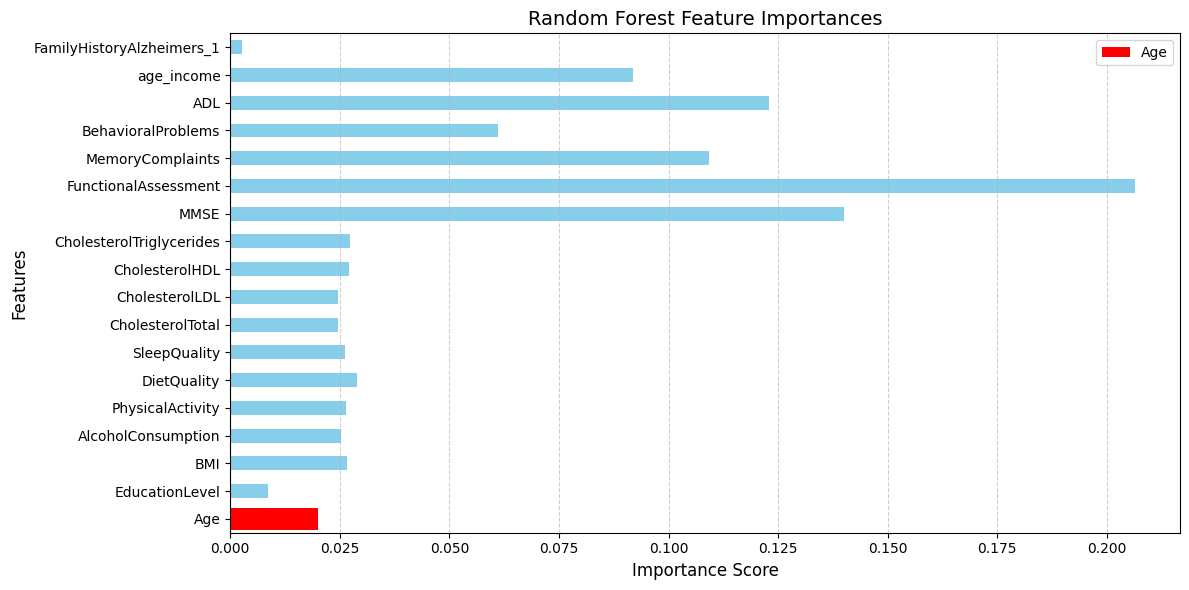

In [368]:
plt.figure(figsize=(12, 6))

# Plot horizontal bar graph (easier to read long feature names)
feature_importances.plot(kind='barh', color='skyblue')

# Highlight the 'Age' feature
if 'Age' in feature_importances:
    age_idx = feature_importances.index.get_loc('Age')
    plt.barh(age_idx, feature_importances['Age'], color='red', label='Age')

# Customize the plot
plt.title("Random Forest Feature Importances", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### The Changable Features
 1. BMI

        BehavioralProblems          0.035909

        FunctionalAssessment       -0.030683
 2. Alcohol Consumption

        CholesterolTriglycerides    0.023645
 3. Physical Activity 

       CholesterolTriglycerides     0.026701

       AlcoholConsumption           0.022713

       CholesterolLDL               0.018160
 4. Diet Quality - 

       SleepQuality                0.051264

       CholesterolTriglycerides    0.035324

       CholesterolLDL             -0.023976
       
 5. Sleep Quality - associated with FunctionalAssessment & DietQuality
      DietQuality                  0.051264
      
      FunctionalAssessment         0.029828     

Features related to BMI
CholesterolHDL              0.037960
BehavioralProblems          0.035909
FunctionalAssessment       -0.030683
MemoryComplaints            0.029268
EducationLevel             -0.025187
CholesterolLDL              0.023997
DietQuality                 0.019772
CholesterolTriglycerides   -0.018362
Age                        -0.016253
age_income                 -0.012504
Name: BMI, dtype: float64
------------------------

Features related to AlcoholConsumption
CholesterolTotal           -0.034086
MemoryComplaints           -0.029919
CholesterolTriglycerides    0.023645
PhysicalActivity            0.022713
DietQuality                 0.020412
CholesterolLDL             -0.017586
FunctionalAssessment       -0.015872
BehavioralProblems          0.013348
MMSE                       -0.011249
EducationLevel             -0.010717
Name: AlcoholConsumption, dtype: float64
------------------------

Features related to PhysicalActivity
CholesterolTriglycerides     0.026701
Alc

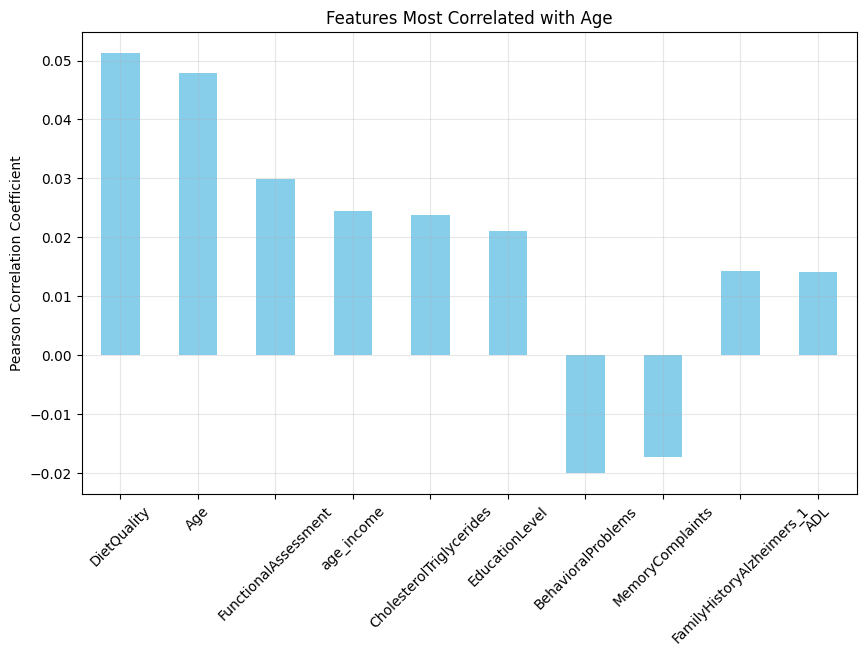

In [380]:
def get_top_spearman_correlations(df, target_feature, n=10):
    """
    Returns the top n features with strongest monotonic relationships.
    """
    corr = df.corr(method='spearman')[target_feature]
    corr = corr.drop(target_feature, errors='ignore')
    top_corr = corr.abs().sort_values(ascending=False).head(n)
    print("Features correlated to " + target_feature + "\n" + str(corr[top_corr.index]) + "\n------------------------\n")
    return corr[top_corr.index]

# For your Alzheimer's dataset
top_correlations = get_top_spearman_correlations(X, 'BMI')
top_correlations = get_top_spearman_correlations(X, 'AlcoholConsumption')
top_correlations = get_top_spearman_correlations(X, 'PhysicalActivity')
top_correlations = get_top_spearman_correlations(X, 'DietQuality')
top_correlations = get_top_spearman_correlations(X, 'SleepQuality')


# Visualize the correlations
plt.figure(figsize=(10, 6))
top_correlations.plot(kind='bar', color='skyblue')
plt.title(f"Features Most Correlated with Age")
plt.ylabel("Pearson Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


## Logistic Regressional Models to Adress correlation:
### BMI

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'subsample': 0.6}
Accuracy: 0.8421
AUC-ROC: 0.5554

Confusion Matrix:
[[272   0]
 [ 51   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       272
           1       0.00      0.00      0.00        51

    accuracy                           0.84       323
   macro avg       0.42      0.50      0.46       323
weighted avg       0.71      0.84      0.77       323



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

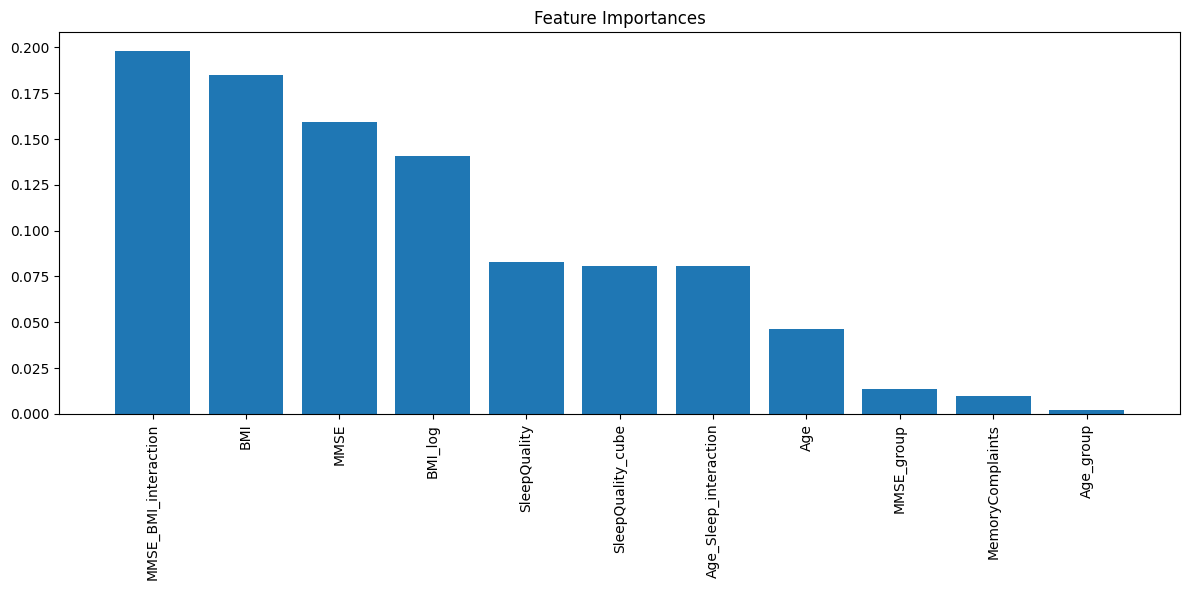

In [438]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import pandas as pd

# Enhanced Feature Engineering
def create_features(df):
    # Nonlinear transformations
    df['SleepQuality_cube'] = df['SleepQuality'] ** 3
    df['BMI_log'] = np.log1p(df['BMI'])
    
    # Interaction terms
    df['Age_Sleep_interaction'] = df['Age'] * df['SleepQuality']
    df['MMSE_BMI_interaction'] = df['MMSE'] * df['BMI']
    
    # Binning important features
    df['Age_group'] = pd.cut(df['Age'], bins=[0, 65, 75, 85, 100], labels=False)
    df['MMSE_group'] = pd.cut(df['MMSE'], bins=[0, 10, 20, 30], labels=False)
    
    return df

X = create_features(usableCSV[features].copy())
y = usableCSV['BehavioralProblems']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Advanced Gradient Boosting with Early Stopping
model = GradientBoostingClassifier(
    n_estimators=1000,  # Increased number of trees
    learning_rate=0.005,  # Lower learning rate
    max_features='sqrt',  # Better for high-dimensional data
    random_state=42,
    validation_fraction=0.2,  # For early stopping
    n_iter_no_change=20,  # Early stopping patience
    tol=1e-4  # Early stopping tolerance
)

# Comprehensive parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Stratified K-Fold for better validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring focusing on both classes
scorer = make_scorer(f1_score, average='weighted')

grid = GridSearchCV(
    model,
    param_grid,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print(f"\nBest Parameters: {grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_probs):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


## Logistic Regressional Models to Adress correlation:
### BMI

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'subsample': 1.0}
R-squared: -0.0026
RMSE: 99.95 mg/dL


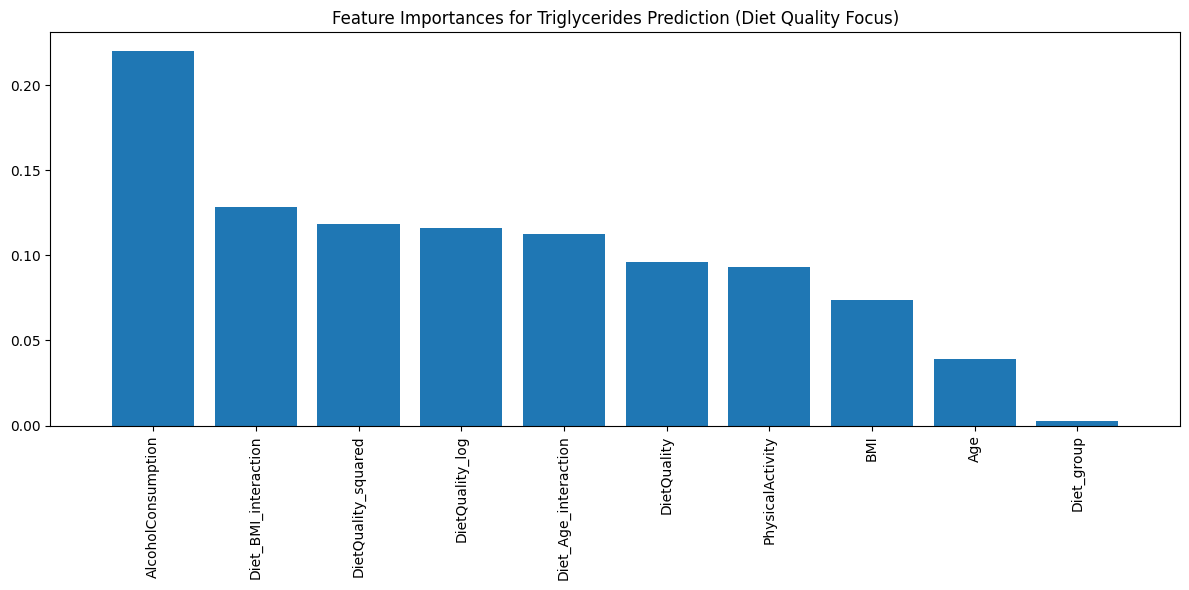

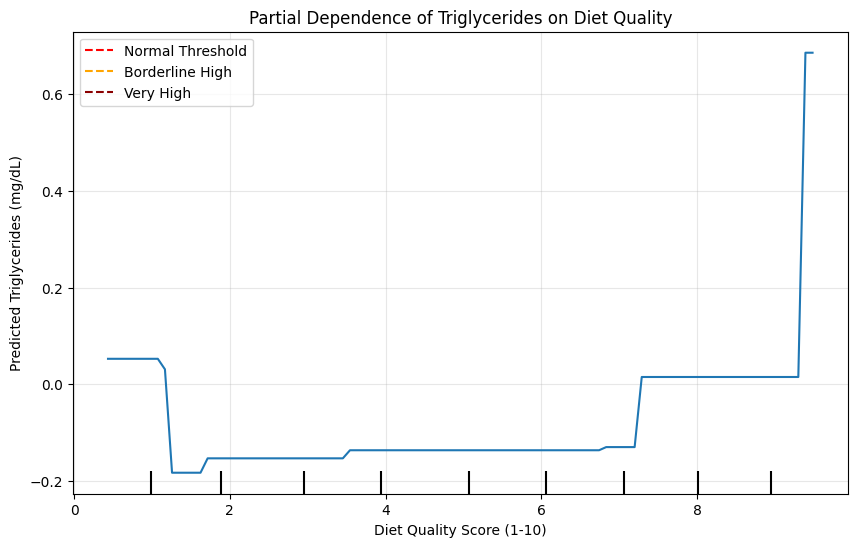

In [440]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enhanced Feature Engineering for Triglycerides prediction
def create_features(df):
    # Nonlinear transformations
    df['DietQuality_squared'] = df['DietQuality'] ** 2
    df['DietQuality_log'] = np.log1p(11 - df['DietQuality'])  # Inverse since lower=better
    
    # Interaction terms with diet quality
    df['Diet_BMI_interaction'] = df['DietQuality'] * df['BMI']
    df['Diet_Age_interaction'] = df['DietQuality'] * df['Age']
    
    # Binning diet quality (assuming 1-10 scale where 10=best)
    df['Diet_group'] = pd.cut(df['DietQuality'], 
                             bins=[0, 3, 6, 8, 10], 
                             labels=[0, 1, 2, 3])
    
    return df

# Select features and target
features = ['DietQuality', 'BMI', 'Age', 'PhysicalActivity', 'AlcoholConsumption']
X = create_features(usableCSV[features].copy())
y = usableCSV['CholesterolTriglycerides']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Gradient Boosting Regressor with Early Stopping
model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_features='sqrt',
    random_state=42,
    validation_fraction=0.2,
    n_iter_no_change=20,
    tol=1e-4
)

# Parameter grid for regression
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

# K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    model,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(f"\nBest Parameters: {grid.best_params_}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} mg/dL")

# Feature Importance Visualization
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Triglycerides Prediction (Diet Quality Focus)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Partial Dependence Plot for Diet Quality
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    best_model,
    X,
    features=['DietQuality'],
    ax=ax
)
plt.title("Partial Dependence of Triglycerides on Diet Quality")
plt.xlabel("Diet Quality Score (1-10)")
plt.ylabel("Predicted Triglycerides (mg/dL)")
plt.grid(True, alpha=0.3)

# Add clinical reference lines
plt.axhline(y=150, color='r', linestyle='--', label='Normal Threshold')
plt.axhline(y=200, color='orange', linestyle='--', label='Borderline High')
plt.axhline(y=500, color='darkred', linestyle='--', label='Very High')
plt.legend()

plt.show()